### Prachee Prasad, 281060

## Assignment 4

Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing details of
customers to predict customer response for special offer.

Create confusion matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [20]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [21]:
# Define target variable
X = df.drop(columns=["AHD"])
y = df["AHD"]

In [22]:
# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train a classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predictions
y_pred = model.predict(X_test)

In [26]:
# --- Compute Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[27  2]
 [ 5 27]]


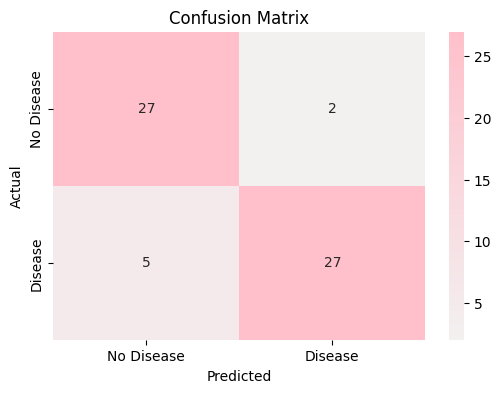

In [27]:
# Plot pink confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette("pink", as_cmap=True),
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
# --- Compute Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
# Display results
print("\nModel Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Model Evaluation Metrics:
Accuracy:  0.8852
Precision: 0.9310
Recall:    0.8438
F1-Score:  0.8852


In [34]:
# --- Save the Random Forest Model using Pickle ---
with open("/content/drive/MyDrive/MLLABheartrandom_forest_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
print("Model saved successfully using Pickle!")

Model saved successfully using Pickle!
